In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from numpy import random
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
cleandata = pd.read_csv("data5.csv")
oridata = pd.read_csv("data3.csv")

In [4]:
## delete outliers
cleandata = cleandata.drop(oridata[(oridata['TotalBsmtSF']>5000)].index)
#cleandata = cleandata.drop(oridata[(oridata['BsmtFinSF1']>5000)].index)
cleandata = cleandata.drop(oridata[(oridata['BsmtFinType2']==1) & (oridata['SalePrice']>500000)].index)

In [5]:
num_list=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 
'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
  'MoSold', 'YrSold']
ordi_list = ['OverallQual', 'OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','HeatingQC','KitchenQual','Functional','GarageFinish','GarageQual',
'PavedDrive','Fence']

col_list = list(cleandata.columns)
col_list.remove('SalePrice') 
numdata = cleandata[col_list]
output = cleandata['SalePrice']
x_all = numdata.to_numpy()
y_all = output.to_numpy()

In [6]:
## split training testing and validation set
from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(x_all,y_all,train_size = 0.8)
x,x_valid,y,y_valid = train_test_split(x,y,train_size = 0.8)
print(x.shape[0])

932


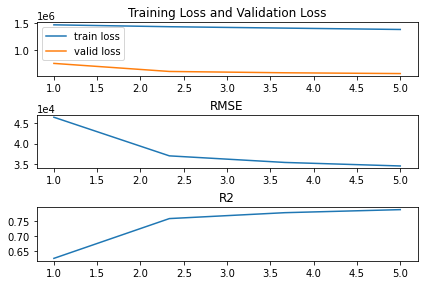

In [7]:
## setting parameters 
featurenum = x.shape[1]
datanum = x.shape[0]
alpha = 0.05
theta = random.rand(featurenum)
bias = random.rand(1)
theta_new = np.zeros(featurenum)
bias_new = 0
iteration = 50
train_num = x.shape[0]
test_num = x_test.shape[0]
valid_num = x_valid.shape[0]
lossvalue = np.zeros(iteration)
validlossvalue = np.zeros(iteration)
rmse = np.zeros(iteration)
r2 = np.zeros(iteration)

## batch gradient descent
for k in range(iteration):
    loss = 0
    valid_loss = 0
    
    ## update regression coefficient
    for j in range(featurenum):
        grad_theta = 0
        grad_bias = 0
        for i in range(train_num):
            grad_theta = grad_theta + (2/train_num)*(y[i] - (np.dot(theta,x[i]) + bias))*x[i,j]
        theta_new[j] = theta[j] + alpha*grad_theta
        
    grad_bias = 0
    for i in range(train_num):
        grad_bias = grad_bias + (2/train_num)*(y[i] - (np.dot(theta,x[i]) + bias))
    bias_new = bias + alpha*grad_bias
    
    ## update traiining loss and validation loss
    for i in range(train_num):
        loss = math.sqrt(pow(loss,2) + pow(y[i] - np.dot(theta,x[i]),2))
        
    for i in range(valid_num):
        valid_loss = math.sqrt(pow(valid_loss,2) + pow(y_valid[i] - (np.dot(theta,x_valid[i]) + bias),2))
        
    theta = theta_new 
    bias = bias_new

    lossvalue[k] = loss
    validlossvalue[k] = valid_loss
    
    ## compute r-squared and RMSE
    y_hat = np.zeros(test_num)
    for i in range(test_num):
        y_hat[i] = np.dot(theta,x_test[i]) + bias
    r2[k] = r2_score(y_test, y_hat)
    rmse[k] = mean_squared_error(y_test, y_hat, squared = False)

## draw training loss and validation loss curve
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
x1_axis = np.linspace(1, iteration, iteration-1)
ax1.plot(x1_axis, lossvalue[1:iteration], label='train loss')
x2_axis = np.linspace(1, iteration, iteration-1)
ax1.plot(x1_axis, validlossvalue[1:iteration], label='valid loss')
ax1.legend()
plt.tight_layout()

## draw RMSE curve
ax2.plot(x2_axis, rmse[1:iteration], label='RMSE')
ax2.ticklabel_format(axis='y', style="sci", scilimits=(0,0))
plt.tight_layout()

## draw r-squared cvuve
x3_axis = np.linspace(1, iteration, iteration-1)
ax3.plot(x3_axis, r2[1:iteration], label='r2 score')
plt.tight_layout()

ax1.title.set_text('Training Loss and Validation Loss')
ax2.title.set_text('RMSE')
ax3.title.set_text('R2')
plt.savefig('train_validation_error.jpg')
#50